### NAME: T.VARUNDEEP
### REG NO: 20MID0145
#### VIT VELLORE


In [1]:
##IMPORTING THE LIBRARIES
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sb
import matplotlib.pyplot as mp

In [5]:
#LOAD THE DATASET
dataset = pd.read_csv('drug200.csv')
dataset

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [6]:
dataset.shape

(200, 6)

In [7]:
#Dataset information
dataset.info

<bound method DataFrame.info of      Age Sex      BP Cholesterol  Na_to_K   Drug
0     23   F    HIGH        HIGH   25.355  drugY
1     47   M     LOW        HIGH   13.093  drugC
2     47   M     LOW        HIGH   10.114  drugC
3     28   F  NORMAL        HIGH    7.798  drugX
4     61   F     LOW        HIGH   18.043  drugY
..   ...  ..     ...         ...      ...    ...
195   56   F     LOW        HIGH   11.567  drugC
196   16   M     LOW        HIGH   12.006  drugC
197   52   M  NORMAL        HIGH    9.894  drugX
198   23   M  NORMAL      NORMAL   14.020  drugX
199   40   F     LOW      NORMAL   11.349  drugX

[200 rows x 6 columns]>

In [8]:
#check for statistical info
dataset.describe

<bound method NDFrame.describe of      Age Sex      BP Cholesterol  Na_to_K   Drug
0     23   F    HIGH        HIGH   25.355  drugY
1     47   M     LOW        HIGH   13.093  drugC
2     47   M     LOW        HIGH   10.114  drugC
3     28   F  NORMAL        HIGH    7.798  drugX
4     61   F     LOW        HIGH   18.043  drugY
..   ...  ..     ...         ...      ...    ...
195   56   F     LOW        HIGH   11.567  drugC
196   16   M     LOW        HIGH   12.006  drugC
197   52   M  NORMAL        HIGH    9.894  drugX
198   23   M  NORMAL      NORMAL   14.020  drugX
199   40   F     LOW      NORMAL   11.349  drugX

[200 rows x 6 columns]>

<Axes: xlabel='Drug', ylabel='count'>

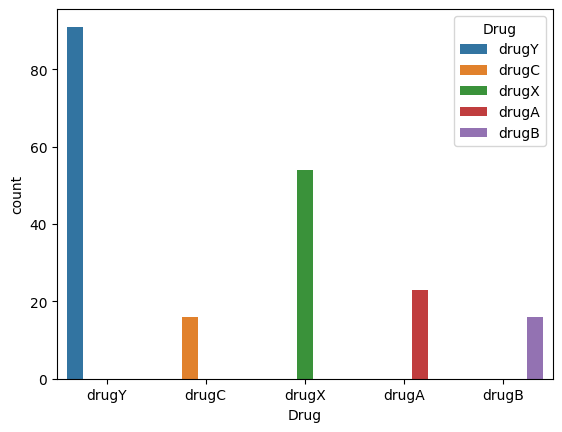

In [9]:
#Visualize in the Graph forms
sb.countplot(x='Drug',data=dataset,hue='Drug')


<Axes: xlabel='Sex', ylabel='count'>

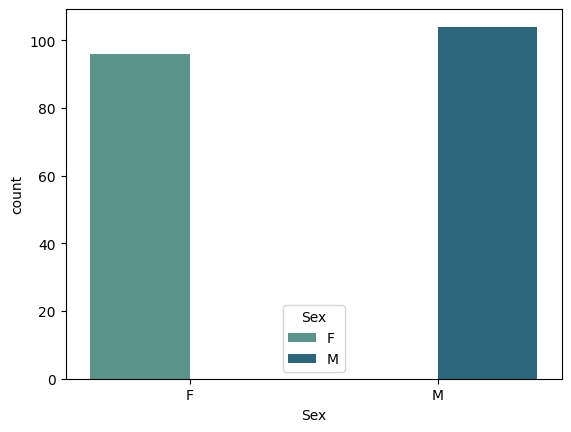

In [10]:
sb.countplot(x='Sex',data=dataset,palette='crest',hue='Sex')

<Axes: xlabel='BP', ylabel='count'>

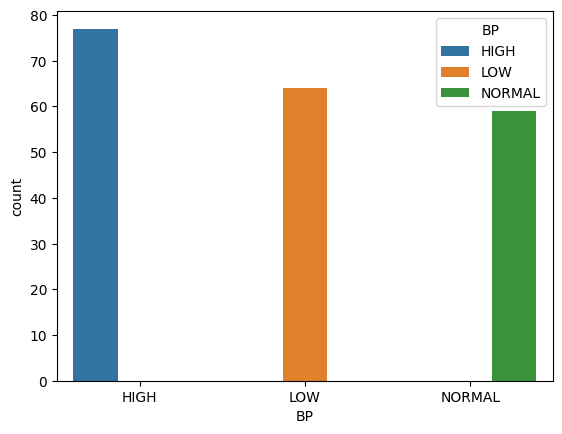

In [11]:
sb.countplot(x='BP',data=dataset,hue='BP')

<Axes: xlabel='Na_to_K', ylabel='Count'>

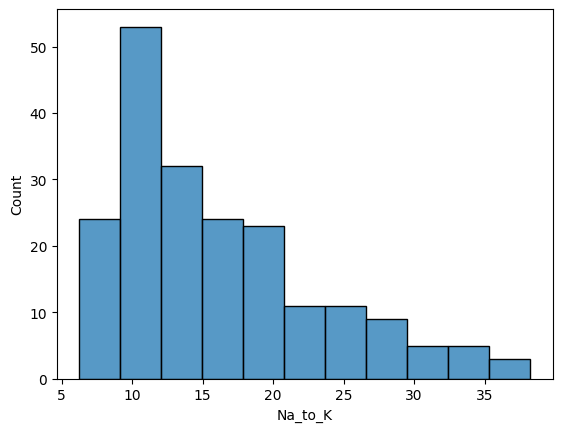

In [12]:
sb.histplot(x='Na_to_K',data=dataset)

In [13]:
#segregate the data into the train & test
X = dataset.drop(columns = ['Drug'],axis=1)
Y = dataset['Drug']

In [14]:
#Drug column is the output(target) column in this dataset.
Y_class = len(np.unique(Y))
print(Y_class)

5


In [15]:
#Convert the Categorical data into interger data¶
X = pd.get_dummies(X,columns=['Sex','BP','Cholesterol'],drop_first = True)
LE = LabelEncoder()
Y = LE.fit_transform(Y)
X_train, X_test, Y_train, Y_test = train_test_split (X,Y,test_size=0.3,random_state=2)


In [16]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
Y_train = keras.utils.to_categorical(Y_train)
Y_test = keras.utils.to_categorical(Y_test)

In [17]:
#Task 2: Build the ANN model with (input layer, min 3 hidden layers & output layer)create a model
model = Sequential()
model.add(Dense(48, input_dim=6, activation='relu'))
model.add(Dense(36, activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(12, activation='relu'))
output_layer = Dense(Y_class,activation='softmax')
model.add(output_layer)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 48)                336       
                                                                 
 dense_1 (Dense)             (None, 36)                1764      
                                                                 
 dense_2 (Dense)             (None, 24)                888       
                                                                 
 dense_3 (Dense)             (None, 12)                300       
                                                                 
 dense_4 (Dense)             (None, 5)                 65        
                                                                 
Total params: 3,353
Trainable params: 3,353
Non-trainable params: 0
_________________________________________________________________


In [18]:
#compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#train the model
model.fit(X_train,Y_train,epochs=48,batch_size=6)

Epoch 1/48
24/24 [==============================] - 3s 2ms/step - loss: 1.5331 - accuracy: 0.2143
Epoch 2/48
24/24 [==============================] - 0s 2ms/step - loss: 1.4163 - accuracy: 0.3286
Epoch 3/48
24/24 [==============================] - 0s 2ms/step - loss: 1.2720 - accuracy: 0.6000
Epoch 4/48
24/24 [==============================] - 0s 2ms/step - loss: 1.1376 - accuracy: 0.4714
Epoch 5/48
24/24 [==============================] - 0s 2ms/step - loss: 0.9900 - accuracy: 0.4786
Epoch 6/48
24/24 [==============================] - 0s 2ms/step - loss: 0.8012 - accuracy: 0.7214
Epoch 7/48
24/24 [==============================] - 0s 2ms/step - loss: 0.6112 - accuracy: 0.7857
Epoch 8/48
24/24 [==============================] - 0s 2ms/step - loss: 0.4744 - accuracy: 0.8571
Epoch 9/48
24/24 [==============================] - 0s 2ms/step - loss: 0.3888 - accuracy: 0.9000
Epoch 10/48
24/24 [==============================] - 0s 2ms/step - loss: 0.3102 - accuracy: 0.9000
Epoch 11/48
24/24 [

In [19]:
#evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc * 100)

2/2 [==============================] - 0s 8ms/step - loss: 0.3741 - accuracy: 0.8667
Test accuracy: 86.66666746139526
